# Using a Decision Tree to predict the severity of a defect

### Import the libraries and data

In [3]:
# import libraries
%pip install seaborn matplotlib pandas scikit-learn numpy kagglehub missingno


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import kagglehub

import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate


# Download the latest version of the dataset
path = kagglehub.dataset_download("fahmidachowdhury/manufacturing-defects")

# Construct the file path to the dataset
file_path = f"{path}/defects_data.csv"

# Load the dataset using the dynamically generated file path
defects = pd.read_csv(file_path)

# View the first few rows of the dataset to confirm it loaded correctly
print("Dataset loaded successfully!")
print(defects.head())

# Quick data overview
print(defects.head())
print(defects.info())
print(defects['severity'].value_counts(normalize=True))




[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Dataset loaded successfully!
   defect_id  product_id defect_type defect_date defect_location  severity  \
0          1          15  Structural    6/6/2024       Component     Minor   
1          2           6  Functional   4/26/2024       Component     Minor   
2          3          84  Structural   2/15/2024        Internal     Minor   
3          4          10  Functional   3/28/2024        Internal  Critical   
4          5          14    Cosmetic   4/26/2024       Component     Minor   

   inspection_method  repair_cost  
0  Visual Inspection       245.47  
1  Visual Inspection        26.87  
2  Automated Testing       835.81  
3  Automated Testing       444.47  
4     Manual Testing       823.64  
   defect_id  product_id defect_type defect_date defect_location  severity  \
0          1      

In [4]:

# Download the latest version of the dataset
path = kagglehub.dataset_download("fahmidachowdhury/manufacturing-defects")

# Construct the file path to the dataset
file_path = f"{path}/defects_data.csv"

# Load the dataset using the dynamically generated file path
defects = pd.read_csv(file_path)

# View the first few rows of the dataset to confirm it loaded correctly
print("Dataset loaded successfully!")
print(defects.head())

# Quick data overview
print(defects.head())
print(defects.info())
print(defects['severity'].value_counts(normalize=True))

Dataset loaded successfully!
   defect_id  product_id defect_type defect_date defect_location  severity  \
0          1          15  Structural    6/6/2024       Component     Minor   
1          2           6  Functional   4/26/2024       Component     Minor   
2          3          84  Structural   2/15/2024        Internal     Minor   
3          4          10  Functional   3/28/2024        Internal  Critical   
4          5          14    Cosmetic   4/26/2024       Component     Minor   

   inspection_method  repair_cost  
0  Visual Inspection       245.47  
1  Visual Inspection        26.87  
2  Automated Testing       835.81  
3  Automated Testing       444.47  
4     Manual Testing       823.64  
   defect_id  product_id defect_type defect_date defect_location  severity  \
0          1          15  Structural    6/6/2024       Component     Minor   
1          2           6  Functional   4/26/2024       Component     Minor   
2          3          84  Structural   2/15/2024    

In [5]:
# Ensure the dataset is loaded
if 'defects' not in locals():
	path = kagglehub.dataset_download("fahmidachowdhury/manufacturing-defects")
	file_path = f"{path}/defects_data.csv"
	defects = pd.read_csv(file_path)

# Quick data overview
print(defects.head())
print(defects.info())
print(defects['severity'].value_counts(normalize=True))


   defect_id  product_id defect_type defect_date defect_location  severity  \
0          1          15  Structural    6/6/2024       Component     Minor   
1          2           6  Functional   4/26/2024       Component     Minor   
2          3          84  Structural   2/15/2024        Internal     Minor   
3          4          10  Functional   3/28/2024        Internal  Critical   
4          5          14    Cosmetic   4/26/2024       Component     Minor   

   inspection_method  repair_cost  
0  Visual Inspection       245.47  
1  Visual Inspection        26.87  
2  Automated Testing       835.81  
3  Automated Testing       444.47  
4     Manual Testing       823.64  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type  

### Exploratory Data Analysis

In [6]:
# display summary statistics of the dataset
defects.describe()

,defect_id,product_id,repair_cost
count,1000.000000,1000.000000,1000.000000
mean,500.500000,50.837000,507.627150
std,288.819436,29.480935,289.623615
min,1.000000,1.000000,10.220000
25%,250.750000,26.000000,270.902500
50%,500.500000,51.000000,506.430000
75%,750.250000,77.000000,759.065000
max,1000.000000,100.000000,999.640000


In [7]:
from datetime import datetime

# Define the extract_month function
def extract_month(x):
    date = datetime.strptime(x, "%m/%d/%Y")
    return date.month

defects.info()
# Handle errors during data processing
try:
    defects["month"] = defects["defect_date"].apply(extract_month)
except KeyError as e:
    print(f"Missing column in dataset: {e}")
except Exception as e:
    print(f"Error processing data: {e}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   defect_id          1000 non-null   int64  
 1   product_id         1000 non-null   int64  
 2   defect_type        1000 non-null   object 
 3   defect_date        1000 non-null   object 
 4   defect_location    1000 non-null   object 
 5   severity           1000 non-null   object 
 6   inspection_method  1000 non-null   object 
 7   repair_cost        1000 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 62.6+ KB


Summary of Missing Values (by Column):
defect_id            0
product_id           0
defect_type          0
defect_date          0
defect_location      0
severity             0
inspection_method    0
repair_cost          0
month                0
dtype: int64

 Any Missing Values?  False


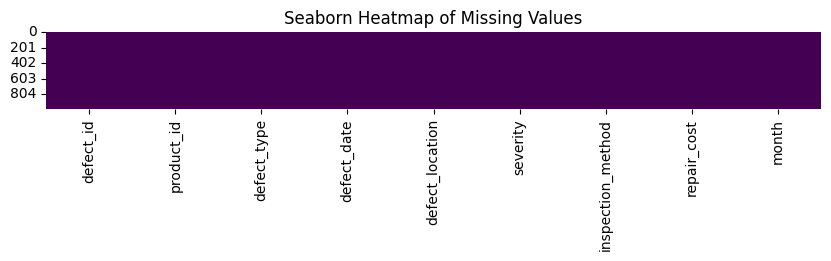

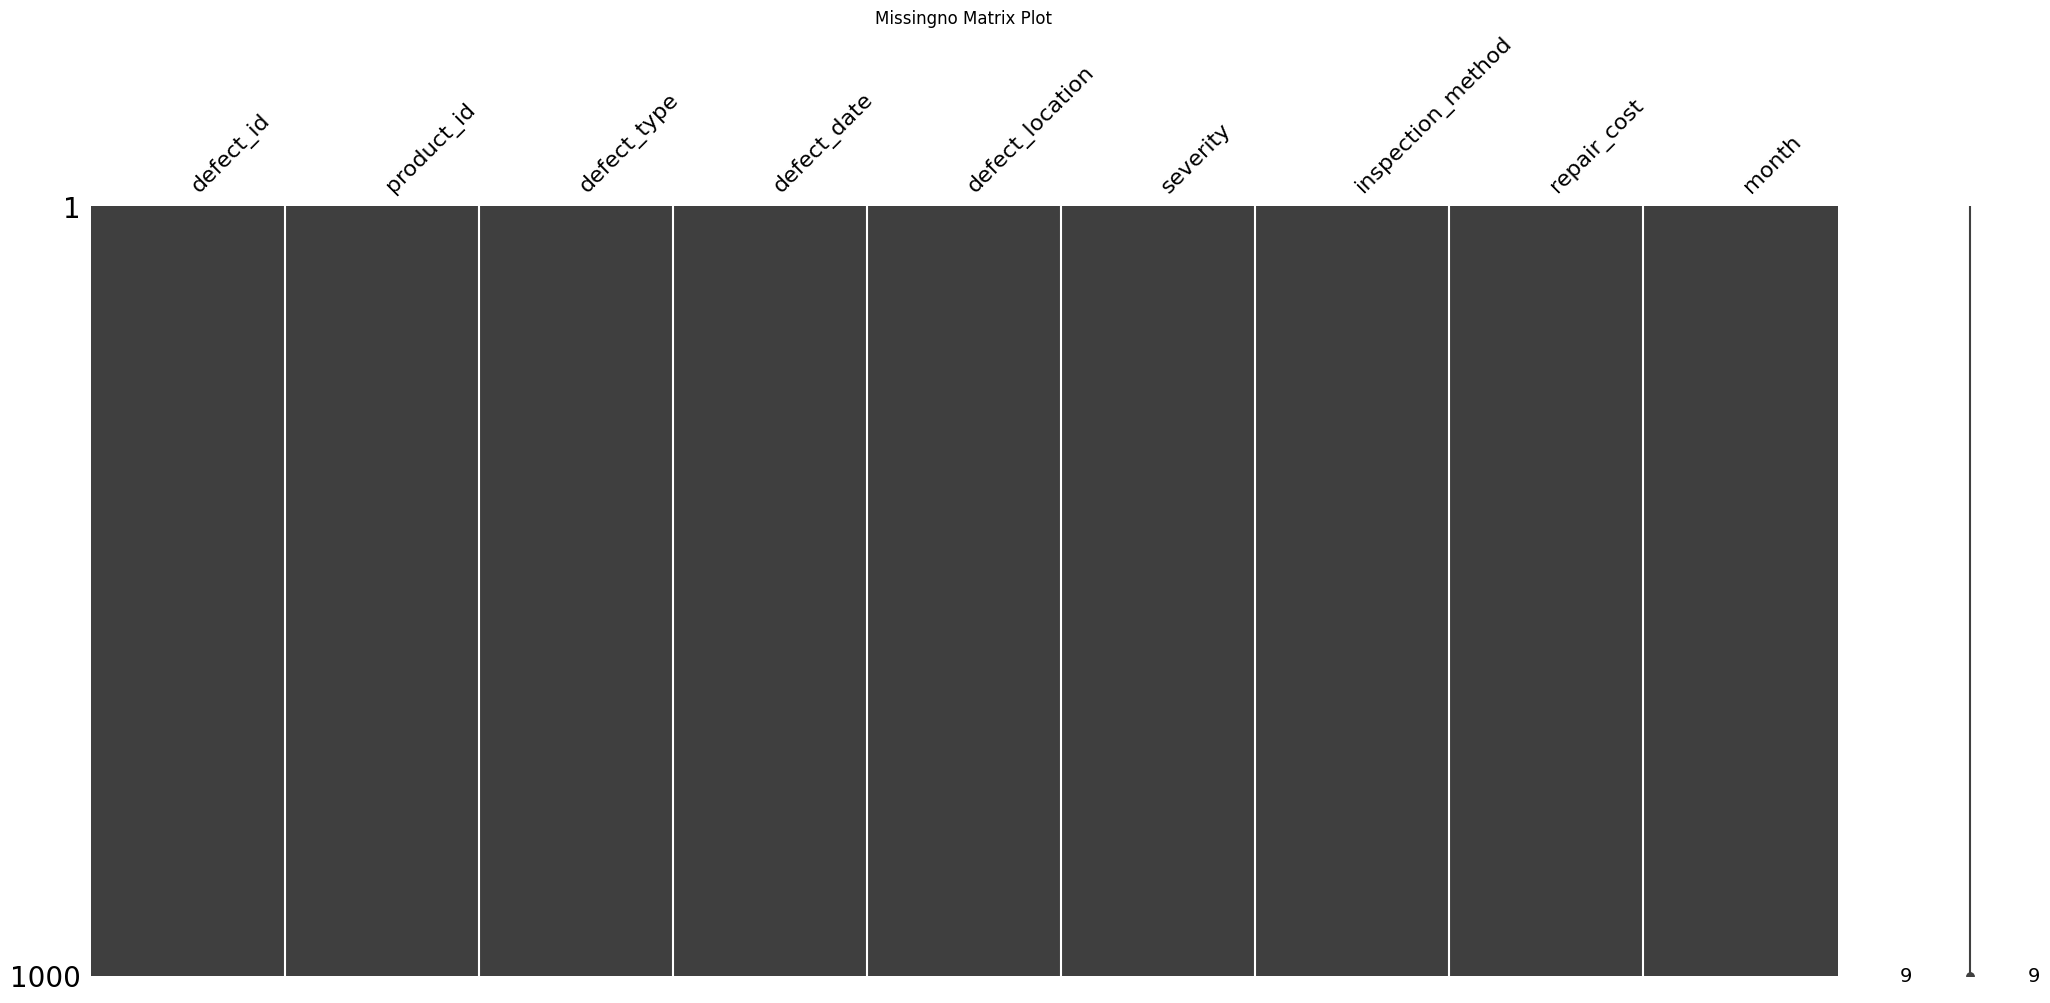

In [8]:
# Ensure missingno is installed

import missingno as msno

def check_missing_values(df):
    """
    Displays a numerical and visual summary of missing values for the defects dataset.
    """
    print("Summary of Missing Values (by Column):")
    print(df.isnull().sum())
    print("\n Any Missing Values? ", df.isnull().values.any())

    # Seaborn Heatmap
    plt.figure(figsize=(10, 1))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Seaborn Heatmap of Missing Values')
    plt.show()

    # Missingno Matrix
    msno.matrix(df)
    plt.title('Missingno Matrix Plot')
    plt.show()

check_missing_values(defects)

##### Preliminary data quality assessment confirmed that all columns were complete, with no missing values present. Several features were identified as categorical and may require transformation into dummy (indicator) variables to support algorithm compatibility and ensure proper model interpretation.  


In [ ]:
# Identify and List out Categorical Columns 
categorical_cols = defects.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols.tolist())


Categorical columns: ['defect_type', 'defect_date', 'defect_location', 'severity', 'inspection_method']


In [ ]:
##### In addition, observations labeled as 'critical' in the severity variable warrant further investigation to assess their distribution and potential associations with other predictors.

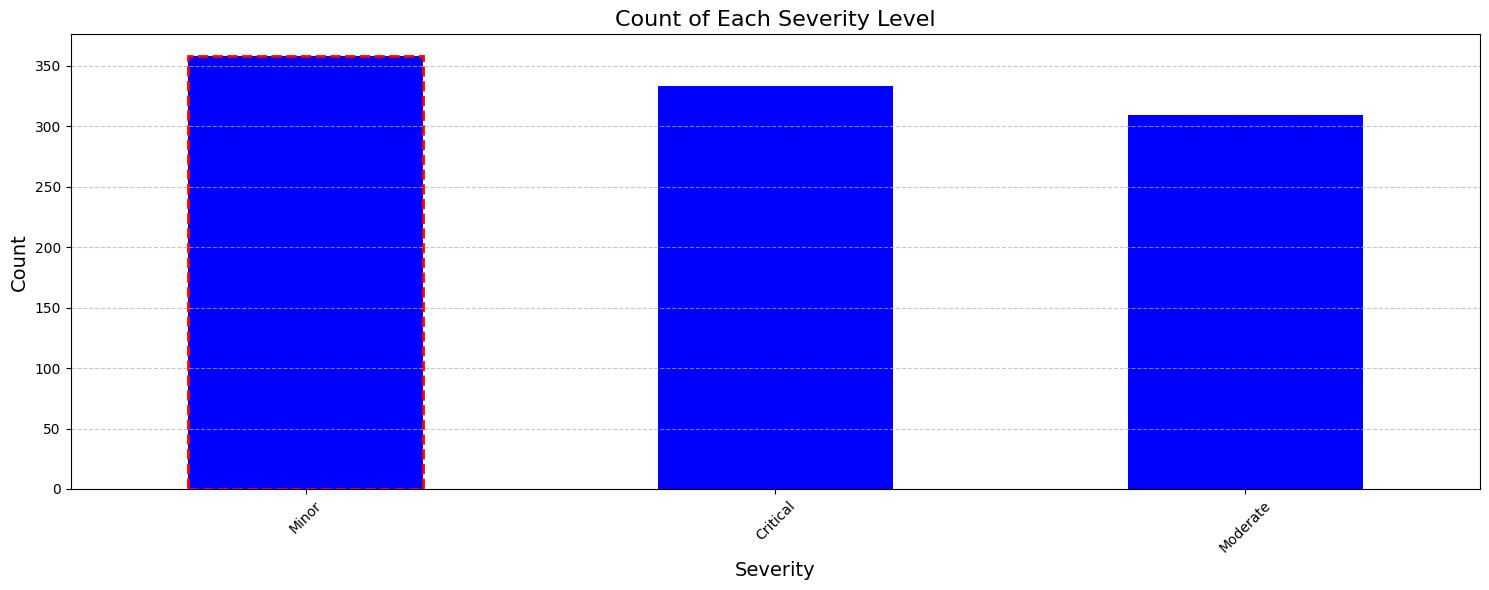

In [ ]:
# check the distribution of the severity feature

#create a bar plot of the severity feature
plt.figure(figsize=(15, 6))
severity_count = defects['severity'].value_counts()
bars = severity_count.plot(kind="bar", color='blue')


# Find the largest bar
max_value = severity_count.max()
max_height_with_tolerance = max_value * 1.1  # Add a tolerance of 10%
max_index = severity_count[severity_count <= max_height_with_tolerance].idxmax()


# Get the index of the largest bar in the patches list
largest_bar_index = severity_count.index.get_loc(max_index)
largest_bar = bars.patches[largest_bar_index]

# Add a dashed rectangle around the largest bar
plt.gca().add_patch(plt.Rectangle(
    (largest_bar.get_x(), 0),  # Bottom-left corner of the bar
    largest_bar.get_width(),  # Width of the bar
    largest_bar.get_height(),  # Height of the bar
    edgecolor='red',          # Color of the dashed line
    linestyle='--',           # Dashed line style
    linewidth=2,              # Thickness of the line
    fill=False                # No fill
))


# Add labels to the bars
plt.title('Count of Each Severity Level', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

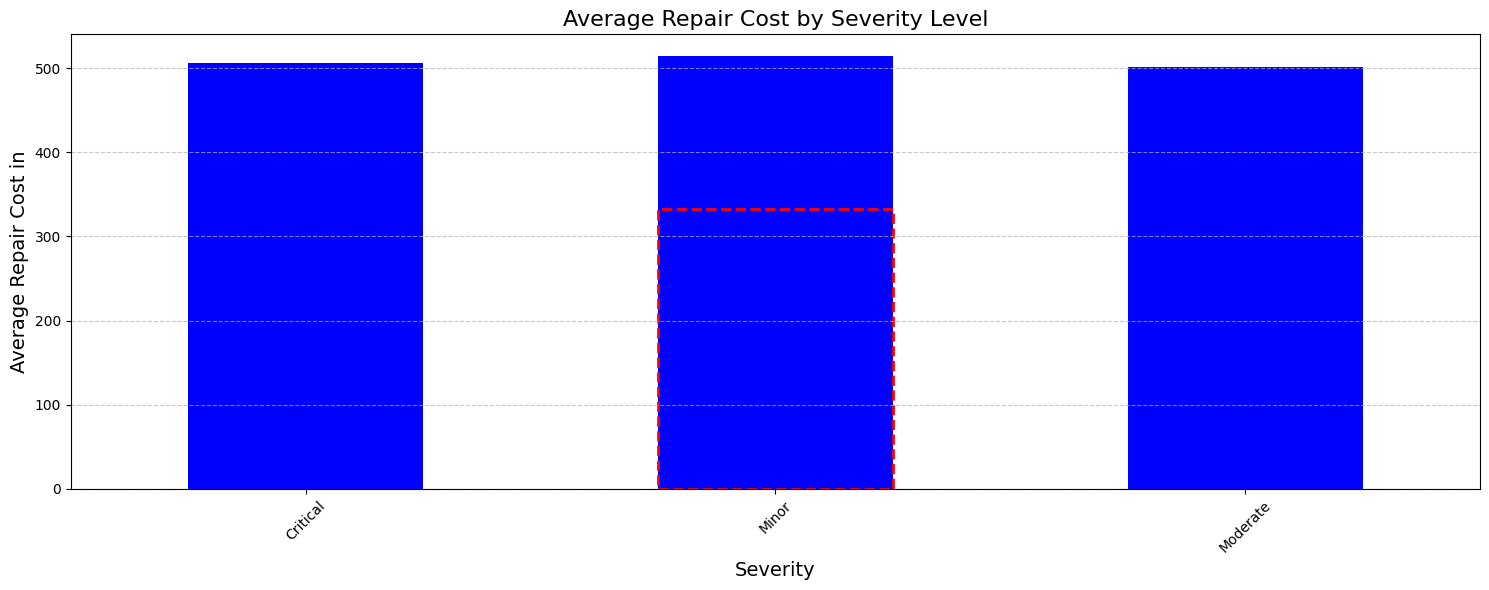

In [ ]:
# Display the average repair cost for each severity level

# Create a bar plot of the average repair cost for each severity level
plt.figure(figsize=(15, 6))
avg_repair_cost = defects.groupby('severity')['repair_cost'].mean()
avg_repair_cost.plot(kind="bar", color='blue')

# Find the largest bar
max_value = avg_repair_cost.max()
max_height_with_tolerance = max_value * 1.1  # Add a tolerance of 10%
max_index = avg_repair_cost[avg_repair_cost <= max_height_with_tolerance].idxmax()


# Get the index of the largest bar in the patches list
largest_bar_index = avg_repair_cost.index.get_loc(max_index)
largest_bar = bars.patches[largest_bar_index]

# Add a dashed rectangle around the largest bar
plt.gca().add_patch(plt.Rectangle(
    (largest_bar.get_x(), 0),  # Bottom-left corner of the bar
    largest_bar.get_width(),  # Width of the bar
    largest_bar.get_height(),  # Height of the bar
    edgecolor='red',          # Color of the dashed line
    linestyle='--',           # Dashed line style
    linewidth=2,              # Thickness of the line
    fill=False                # No fill
))

# add labels to the bars
plt.title('Average Repair Cost by Severity Level', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Average Repair Cost in', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()


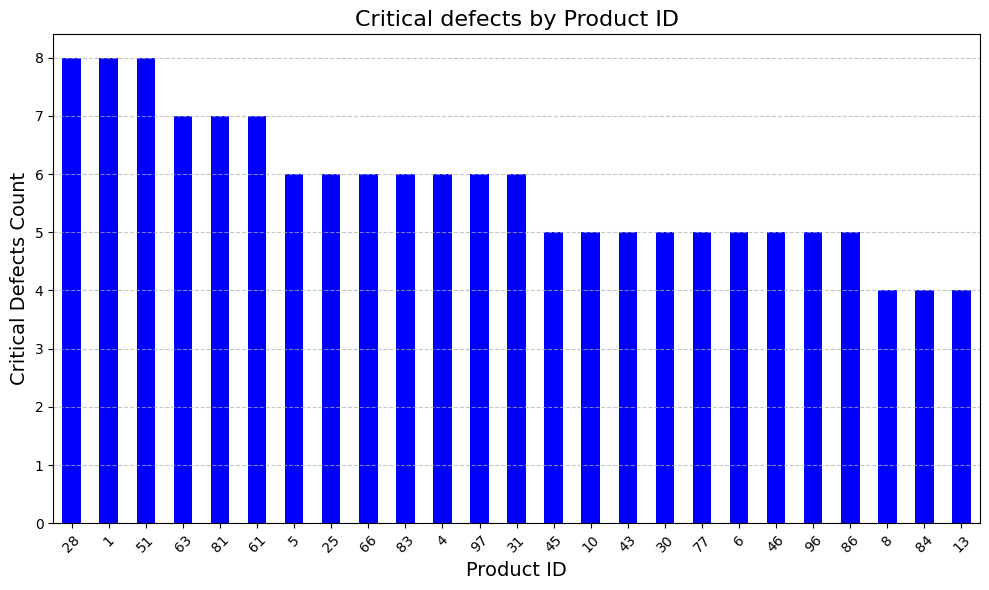

In [ ]:
# Display the count for severe defects in each product id

# create a bar plot of the severity count for each product id
plt.figure(figsize=(10, 6))
critical_defects = defects[defects['severity'] == 'Critical']
critical_by_id = critical_defects['product_id'].value_counts()
top_15_critical = critical_by_id.sort_values(ascending=False).head(25)
top_15_critical.plot(kind="bar", color='blue')

# add labels to the bars
plt.title('Critical defects by Product ID', fontsize=16)
plt.xlabel('Product ID', fontsize=14)
plt.ylabel('Critical Defects Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()

### Create a Decision Tree to predict the severity level of the defect

In [13]:
# Convert defect_date to datetime format displaying the Month name
def extract_month(x):
    date = datetime.strptime(x, "%m/%d/%Y")
    return date.month

defects["month"] = defects["defect_date"].apply(extract_month)

In [14]:
# Map numerical month values to month names
defects['month'] = defects['month'].apply(lambda x: calendar.month_name[x])


NameError: name 'calendar' is not defined

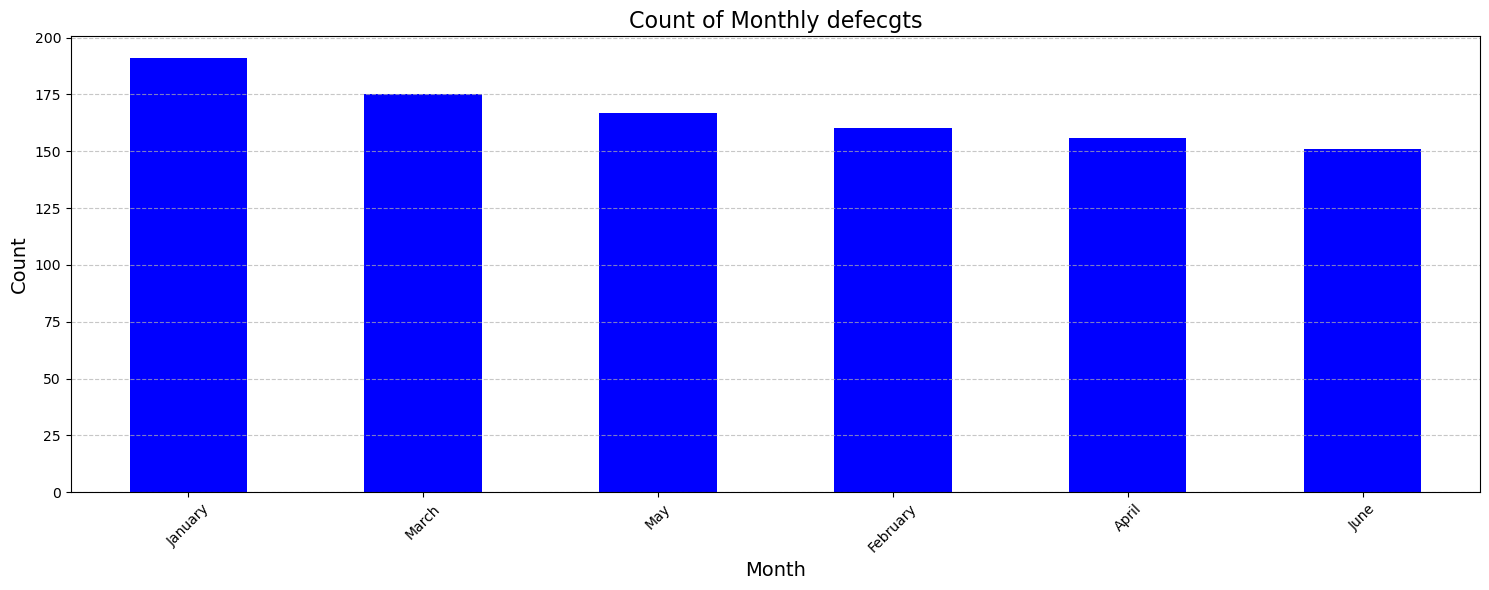

In [ ]:
# check the distribution of the defects by month

#create a bar plot of the defects by month
plt.figure(figsize=(15, 6))
month_count = defects['month'].value_counts()
month_count.plot(kind="bar", color='blue')

# add labels to the bars
plt.title('Count of Monthly Defects', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Prepare the data for modeling
X = defects.drop(columns=['severity', 'defect_date'])
y = defects['severity']


In [ ]:
# check to make sure the data loaded correctly
X.head()

,defect_id,product_id,defect_type,defect_location,inspection_method,repair_cost,month
0,1,15,Structural,Component,Visual Inspection,245.47,June
1,2,6,Functional,Component,Visual Inspection,26.87,April
2,3,84,Structural,Internal,Automated Testing,835.81,February
3,4,10,Functional,Internal,Automated Testing,444.47,March
4,5,14,Cosmetic,Component,Manual Testing,823.64,April


In [ ]:
# check to make sure the data counts remain the same
X['month'].value_counts()

month
January     191
March       175
May         167
February    160
April       156
June        151
Name: count, dtype: int64

In [ ]:
# check the target variable to make sure it loaded correctly
y.head()

0       Minor
1       Minor
2       Minor
3    Critical
4       Minor
Name: severity, dtype: object

In [ ]:
# convert y to numerical values
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# check the target variable to make sure it transformed correctly
print(y[0:10])

[1 1 1 0 1 2 0 2 0 0]


In [ ]:
# One-hot encode categorical features in X
X = pd.get_dummies(X)

In [ ]:
# inspect the transformed features
print(X.head())

   defect_id  product_id  repair_cost  defect_type_Cosmetic  \
0          1          15       245.47                 False   
1          2           6        26.87                 False   
2          3          84       835.81                 False   
3          4          10       444.47                 False   
4          5          14       823.64                  True   

   defect_type_Functional  defect_type_Structural  defect_location_Component  \
0                   False                    True                       True   
1                    True                   False                       True   
2                   False                    True                      False   
3                    True                   False                      False   
4                   False                   False                       True   

   defect_location_Internal  defect_location_Surface  \
0                     False                    False   
1                     False 

In [ ]:
#inspect the transformed features
print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   defect_id                            1000 non-null   int64  
 1   product_id                           1000 non-null   int64  
 2   repair_cost                          1000 non-null   float64
 3   defect_type_Cosmetic                 1000 non-null   bool   
 4   defect_type_Functional               1000 non-null   bool   
 5   defect_type_Structural               1000 non-null   bool   
 6   defect_location_Component            1000 non-null   bool   
 7   defect_location_Internal             1000 non-null   bool   
 8   defect_location_Surface              1000 non-null   bool   
 9   inspection_method_Automated Testing  1000 non-null   bool   
 10  inspection_method_Manual Testing     1000 non-null   bool   
 11  inspection_method_Visual Inspec

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Fit the decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# predict the target variable for the test set and evaluate the model
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix:\n", cm_dt)

Decision Tree Accuracy: 0.32
              precision    recall  f1-score   support

    Critical       0.32      0.37      0.35        97
       Minor       0.34      0.34      0.34       115
    Moderate       0.28      0.24      0.26        88

    accuracy                           0.32       300
   macro avg       0.32      0.32      0.31       300
weighted avg       0.32      0.32      0.32       300

Confusion Matrix:
 [[36 40 21]
 [43 39 33]
 [32 35 21]]


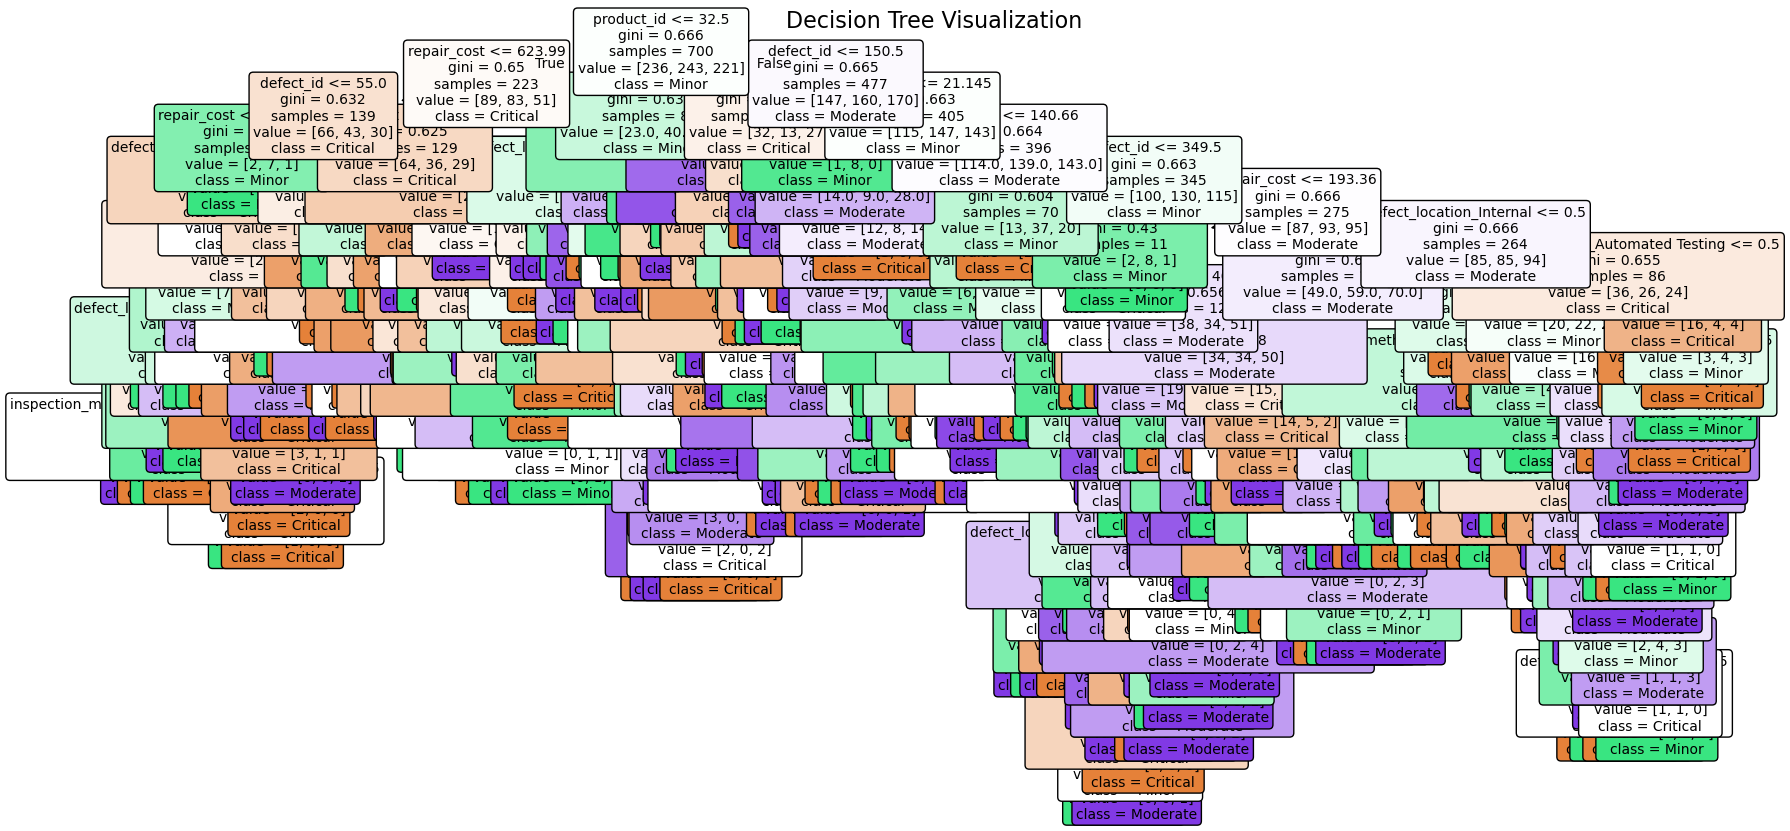

In [ ]:
# Visualize the decision tree to understand the most important features.

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


##### The primary decision was product_id with a secondary condition being defect_id which is a unique identifier for each instance.

#### Create a Decision Tree without the defect_id feature to simplify the tree. Compare to see if the performance improves

In [ ]:
# prepare the data for modeling

# split into X and y. remove the defect_id column from the dataset
X_no_id = defects.drop(columns=['severity', 'defect_date', 'defect_id'])
y = defects['severity']

In [ ]:
# convert y to numerical values
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# One-hot encode categorical features in X_no_id
X_no_id = pd.get_dummies(X_no_id)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_id, y, test_size=0.3, random_state=42)

In [ ]:
# Fit the decision tree model
dt_no_id = DecisionTreeClassifier(random_state=42)
dt_no_id.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# predict the target variable for the test set and evaluate the model
y_pred_dt_no_id = dt_no_id.predict(X_test)
accuracy_dt_no_id = accuracy_score(y_test, y_pred_dt_no_id)
print(f"Decision Tree Accuracy: {accuracy_dt_no_id:.2f}")
print(classification_report(y_test, y_pred_dt_no_id, target_names=le.classes_))
cm_dt_no_id = confusion_matrix(y_test, y_pred_dt_no_id)
print("Confusion Matrix:\n", cm_dt_no_id)

Decision Tree Accuracy: 0.29
              precision    recall  f1-score   support

    Critical       0.24      0.26      0.25        97
       Minor       0.36      0.33      0.35       115
    Moderate       0.28      0.28      0.28        88

    accuracy                           0.29       300
   macro avg       0.29      0.29      0.29       300
weighted avg       0.30      0.29      0.29       300

Confusion Matrix:
 [[25 38 34]
 [46 38 31]
 [34 29 25]]


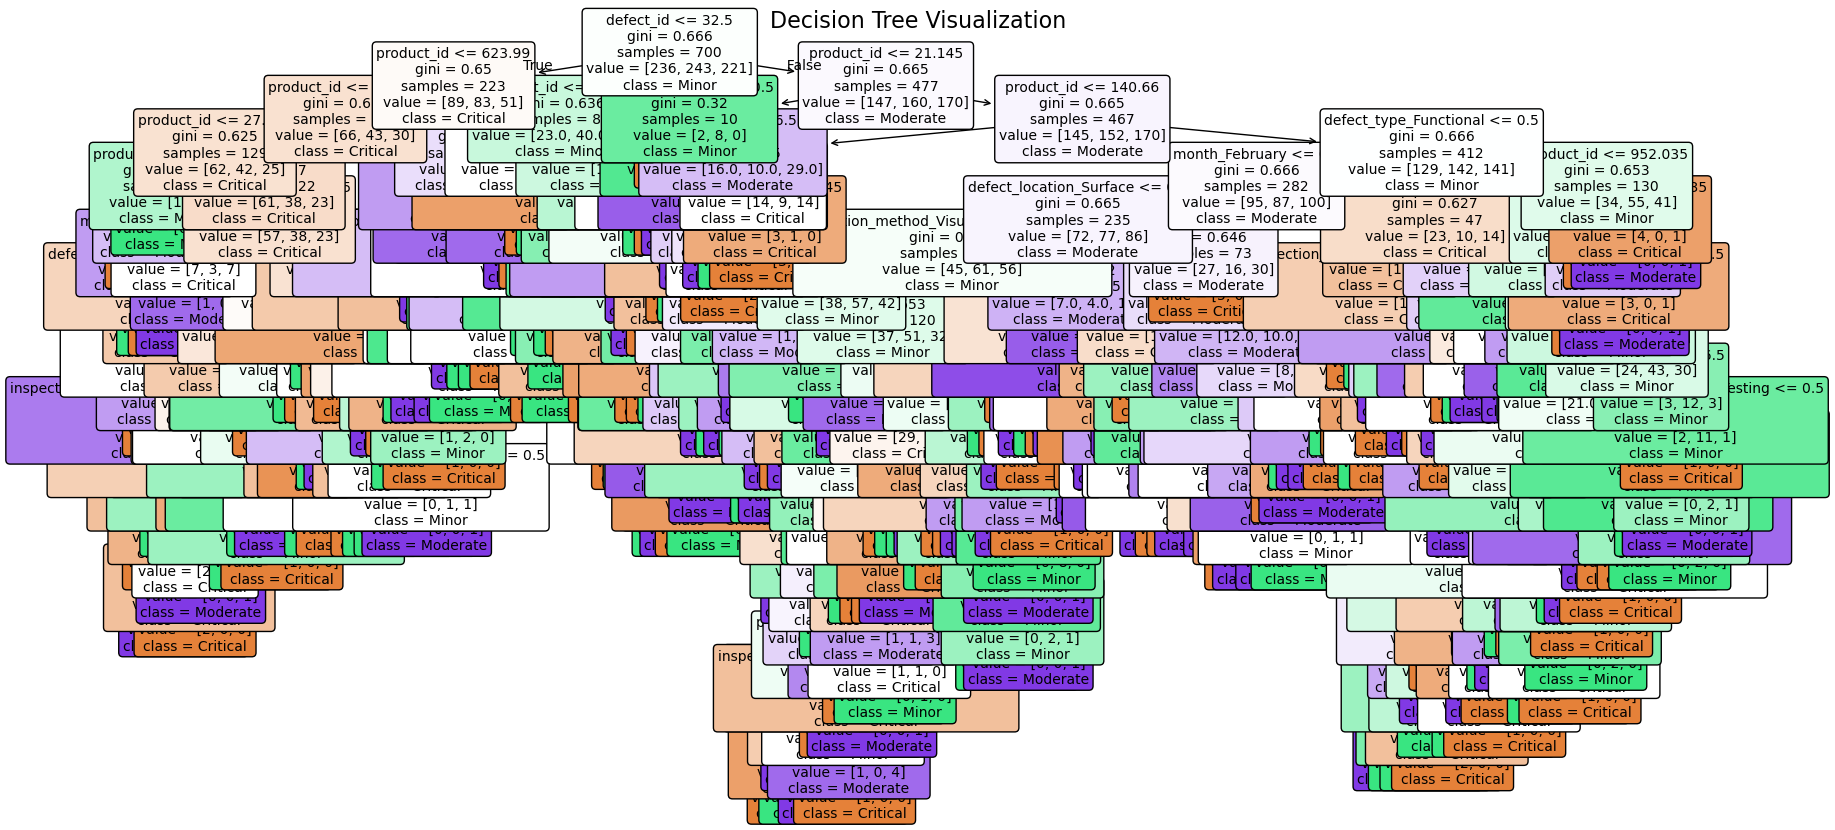

In [ ]:
# Visualize the decision tree to understand the most important features.

plt.figure(figsize=(20, 10))
plot_tree(dt_no_id, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


### Create a Random Forest to predict the severity of the defect

In [ ]:
# Train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate
y_pred_rf = rf_clf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

Random Forest Accuracy: 0.33
              precision    recall  f1-score   support

    Critical       0.33      0.35      0.34        97
       Minor       0.38      0.39      0.38       115
    Moderate       0.24      0.22      0.23        88

    accuracy                           0.33       300
   macro avg       0.32      0.32      0.32       300
weighted avg       0.32      0.33      0.32       300

Confusion Matrix:
 [[34 36 27]
 [37 45 33]
 [31 38 19]]


##### Create a Random Forest without the defect_id

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_id, y, test_size=0.3, random_state=42)

In [ ]:
# Train the Random Forest model
rf_no_id = RandomForestClassifier(n_estimators=100, random_state=42)
rf_no_id.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate
y_pred_rf_no_id = rf_no_id.predict(X_test)

accuracy_rf_no_id = accuracy_score(y_test, y_pred_rf_no_id)
print(f"Random Forest Accuracy: {accuracy_rf_no_id:.2f}")

print(classification_report(y_test, y_pred_rf_no_id, target_names=le.classes_))

cm_rf_no_id = confusion_matrix(y_test, y_pred_rf_no_id)
print("Confusion Matrix:\n", cm_rf_no_id)

Random Forest Accuracy: 0.32
              precision    recall  f1-score   support

    Critical       0.34      0.39      0.36        97
       Minor       0.38      0.36      0.37       115
    Moderate       0.23      0.20      0.22        88

    accuracy                           0.32       300
   macro avg       0.31      0.32      0.31       300
weighted avg       0.32      0.32      0.32       300

Confusion Matrix:
 [[38 32 27]
 [41 41 33]
 [34 36 18]]
